# Introduction to Time Series

Free Text: https://otexts.org/fpp2/

In [11]:
#!conda update pandas --yes

Fetching package metadata ...............
Solving package specifications: .

Package plan for installation in environment /opt/conda:

The following packages will be UPDATED:

    pandas: 0.19.2-np112py36_1 conda-forge --> 0.22.0-py36_0 conda-forge

pandas-0.22.0- 100% |################################| Time: 0:00:06   4.33 MB/s


In [27]:
#!pip install -U pandas==0.19.2

    100% |████████████████████████████████| 18.9MB 36kB/s  eta 0:00:01    76% |████████████████████████▌       | 14.4MB 37.5MB/s eta 0:00:01    86% |███████████████████████████▊    | 16.3MB 28.0MB/s eta 0:00:01
    100% |████████████████████████████████| 215kB 3.2MB/s eta 0:00:01
    100% |████████████████████████████████| 12.2MB 56kB/s  eta 0:00:01
Requirement already up-to-date: pytz>=2011k in /opt/conda/lib/python3.6/site-packages (from pandas==0.19.2)
Requirement already up-to-date: six>=1.5 in /opt/conda/lib/python3.6/site-packages (from python-dateutil>=2->pandas==0.19.2)
  Found existing installation: python-dateutil 2.6.1
    Uninstalling python-dateutil-2.6.1:
      Successfully uninstalled python-dateutil-2.6.1
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
You are using pip version 9.

In [1]:
import pandas as pd

%matplotlib inline

Pandas provides a special focus on support for time series data. Key features relevant for time series forecasting in Pandas include:
- The Series object for representing a univariate time series.
- Explicit handling of date-time indexes in data and date-time ranges.
- Transforms such as shifting, lagging, and filling.
- Resampling methods such as up-sampling, down-sampling, and aggregation.


In [2]:
pd.__version__

'0.19.2'

In [3]:
import statsmodels as sm

In [4]:
bike_sharing_day_df = pd.read_csv('bike_sharing_day.csv', index_col=0)
bike_sharing_hour_df = pd.read_csv('bike_sharing_hour.csv', index_col=0)

##### A time series is a sequence of observations taken sequentially in time.

### Frequency of a time series

The “frequency” is the number of observations before the seasonal pattern repeats. 

| Data | frequency |
|:----:|:---------:|
| Annual |	1 |
| Quarterly |	4 |
| Monthly |	12 |
| Weekly |	52 |

In [5]:
bike_sharing_day_df.shape, bike_sharing_hour_df.shape, 

((731, 15), (17379, 16))

In [6]:
bike_sharing_day_df.shape[0]*24

17544

### Time Series Forecasting
Making predictions about the future is called extrapolation in the classical statistical handling of time series data. More modern fields focus on the topic and refer to it as time series forecasting. Forecasting involves taking models fit on historical data and using them to predict future observations. Descriptive models can borrow from the future (i.e. to smooth or remove noise), they only seek to best describe the data. An important distinction in forecasting is that the future is completely unavailable and must only be estimated from what has already happened.

### Components of Time Series
Time series analysis provides a body of techniques to better understand a dataset. Perhaps the most useful of these is the decomposition of a time series into 4 constituent parts:
- **Level**. The baseline value for the series if it were a straight line.
- **Trend**. The optional and often linear increasing or decreasing behavior of the series over time.
- **Seasonality**. The optional repeating patterns or cycles of behavior over time.
- **Noise**. The optional variability in the observations that cannot be explained by the model.

##### All time series have a level, most have noise, and the trend and seasonality are optional.

#### Concerns of Forecasting

1. How much data do you have available and are you able to gather it all together? More data is often more helpful, offering greater opportunity for exploratory data analysis, model testing and tuning, and model fidelity.
2. What is the time horizon of predictions that is required? Short, medium or long term? Shorter time horizons are often easier to predict with higher confidence.
3. Can forecasts be updated frequently over time or must they be made once and remain static? Updating forecasts as new information becomes available often results in more accurate predictions.
4. At what temporal frequency are forecasts required? Often forecasts can be made at a lower or higher frequencies, allowing you to harness down-sampling, and up-sampling of data, which in turn can offer benefits while modeling.

## Time Series as Supervised Learning

Time series data can be phrased as supervised learning. Given a sequence of numbers for a time series dataset, we can restructure the data to look like a supervised learning problem. We can do this by using previous time steps as input variables and use the next time step as the output variable. Let’s make this concrete with an example. Imagine we have a time series as follows:

In [7]:
sample_data = [
    {'time': 1, 'measure': 100},
    {'time': 2, 'measure': 110},
    {'time': 3, 'measure': 108},
    {'time': 4, 'measure': 115},
    {'time': 5, 'measure': 120},
 ]

In [8]:
sample_data_df = pd.DataFrame(sample_data)
sample_data_df.set_index('time', inplace=True)
sample_data_df

,measure
time,
1,100
2,110
3,108
4,115
5,120


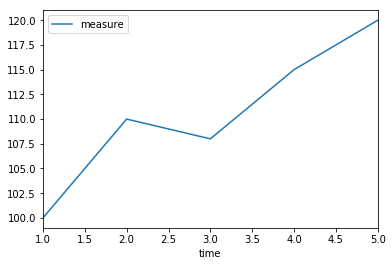

In [9]:
sample_data_df.plot()

We can restructure this time series dataset as a supervised learning problem by using the value at the previous time step to predict the value at the next time-step.

In [10]:
sample_data_df['prev_measure'] = sample_data_df.shift(1)
sample_data_df

,measure,prev_measure
time,,
1,100,NaN
2,110,100.0
3,108,110.0
4,115,108.0
5,120,115.0


We can use the previous measure as input to predict the measure.

In [11]:
from sklearn.linear_model import Lasso

In [12]:
lasso = Lasso()

In [17]:
X = sample_data_df.dropna()
y = X.measure
X = X[['prev_measure']]

In [18]:
lasso.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
sample_data_df['predicted_next'] = lasso.predict(sample_data_df[['measure']])

In [20]:
sample_data_df = sample_data_df[['prev_measure', 'measure', 'predicted_next']]
sample_data_df

,prev_measure,measure,predicted_next
time,,,
1,NaN,100,109.098501
2,100.0,110,114.130621
3,110.0,108,113.124197
4,108.0,115,116.646681
5,115.0,120,119.162741


##### The use of prior time steps to predict the next time step is called the sliding window method.